# Study: Exploratory Data Analysis On Co2 emission of agricultre and food domain

## 1. Problem definition

### Background
Agriculture and food production are among the leading contributors to greenhouse gas emissions globally . From deforestation for farmland to methane emissions from livestock , and the carbon footprint of transporting food products , the sector's impact on climate change is substantial . With increasing global focus on sustainability and climate action , there is a need to better understand the key contributors and patterns of CO emissions within this domain .

### Objective
The Exploratory analysis aims to provide insights into how food and agricultre and geographical areas contribute to Co2 emmision, Using visualization within diffrent regions and time periods.


### Importing Libraries

In [50]:
#pip install -U kaleido

In [51]:
import os
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
plt.style.use('ggplot')
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
from dotenv import load_dotenv
from pathlib import Path

In [52]:
load_dotenv(verbose=True)
env_path = "../../.env"
if os.path.exists(env_path) and os.path.isfile(env_path):
    env_path = Path('../../') / '.env'
else:
    env_path =  Path('.') / '.env'

### Conection to Mongodb database

In [54]:
uri = os.environ.get("mongo_uri_2")
# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))
# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [55]:
#Connecting to Database and Collection
mydb=client.apdv
dataset=mydb.preprocesseddata

In [56]:
#Retriving Data from mongodb
df=pd.DataFrame(list(dataset.find()))

## 2. Exploratory Data Analysis

In [58]:
year_2019 = df.loc[df["Year"]==2019]
kt_19 =year_2019["total_emission"].sum()
gt_19 = round(kt_19 / 1_000_000,2) # the amount of gigatones of CO2
per = gt_19 / 30
print(f"The amount of CO2 from agrifood in 2019 is {gt_19} gigatones (gt), that is:",round(per * 100), "%","of total emissions!")

The amount of CO2 from agrifood in 2019 is 16.79 gigatones (gt), that is: 56 % of total emissions!


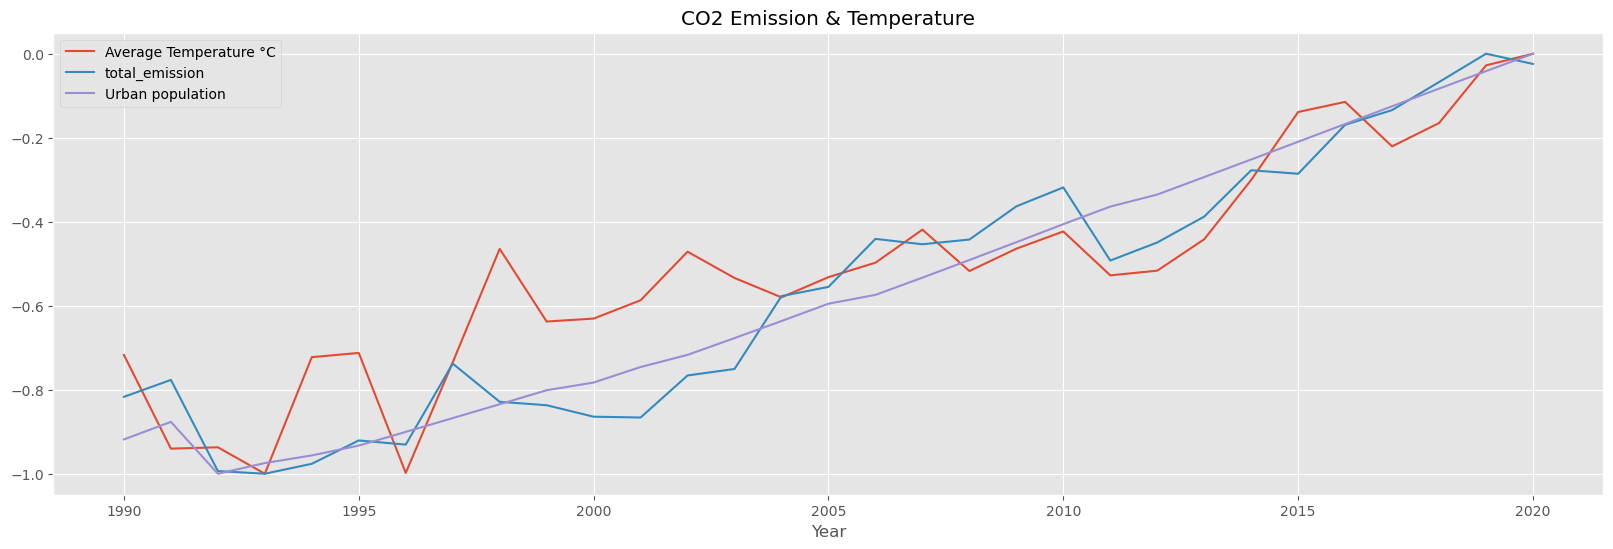

In [59]:
def normalize(df):
    normal = (df - df.max()) / (df.max() - df.min())
    return normal

t_emission = df.groupby("Year").agg({"Average Temperature °C": "mean", "total_emission": "mean", "Urban population": "mean"})
n_temp = normalize(t_emission)


n_temp.plot(figsize=(20, 6))
plt.title("CO2 Emission & Temperature")
plt.savefig("../../outputs/Dataset_03/Temprature_co2_emmision.png",format="png")
plt.show()

In [60]:
fig = px.box(df, x="Year",
             y="Average Temperature °C",
             color="Year",
             color_discrete_sequence=px.colors.sequential.Viridis,
             title='<b>Average temperature distribution by years')
fig.write_image("../../outputs/Dataset_03/Tamp_dist_year.png",format="png")
fig.show()


# Is there any correlation between emissions and temperature?
Countries with a  high  population, has a stronger correlation between climate change and CO2 agrifood emissions. Asia is the continet whit the stronger correlation between both emmisions and temprature

In [62]:
df["pop_tot"] = df["Total Population - Male"] + df["Total Population - Female"]

In [63]:
# Continent Mapping 
continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

#This function assign a continent label to each country in the df
def assign_cont(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return None

df["continent"] = df["Area"].apply(assign_cont)

In [64]:
fig = px.scatter(df, df["Average Temperature °C"],
           df["total_emission"], 
           size= "pop_tot", 
           title = "<b>Temprature rise and co2 emmision by population", 
           template="plotly_dark", 
           color ="continent")
fig.write_image("../../outputs/Dataset_03/emmison_population.png",format="png")
fig.show()

In [65]:
correlation = df.groupby(["Year"]).agg({"total_emission":"sum", "Average Temperature °C":"mean", "pop_tot":"sum"})
correlation.corr()


total_emission  Average Temperature °C   pop_tot
total_emission                1.000000                0.902493  0.978393
Average Temperature °C        0.902493                1.000000  0.903444
pop_tot                       0.978393                0.903444  1.000000

In [66]:
fig = px.scatter(correlation.reset_index(),    
    x = "total_emission", 
    y = "Average Temperature °C", 
    size = "pop_tot",
    color = "Year", 
    title = "<br> Temperature & CO2 Emissions - global relation",
    template="plotly_dark")
fig.write_image("../../outputs/Dataset_03/early_emmisions.png",format="png")
fig.show()

In [67]:
fig = px.scatter_3d(df.groupby(["continent","Year"])\
                    .agg({"total_emission":"sum", 
                          "Average Temperature °C":"mean", 
                          "pop_tot":"sum"}).reset_index(),
                          z = "total_emission", 
                          y = "Average Temperature °C", 
                          x = "Year",
                          color="continent",
                          size = "pop_tot",
                           title = "<br> Temperature & CO2 Emissions - per Continent and Year")
fig.show()

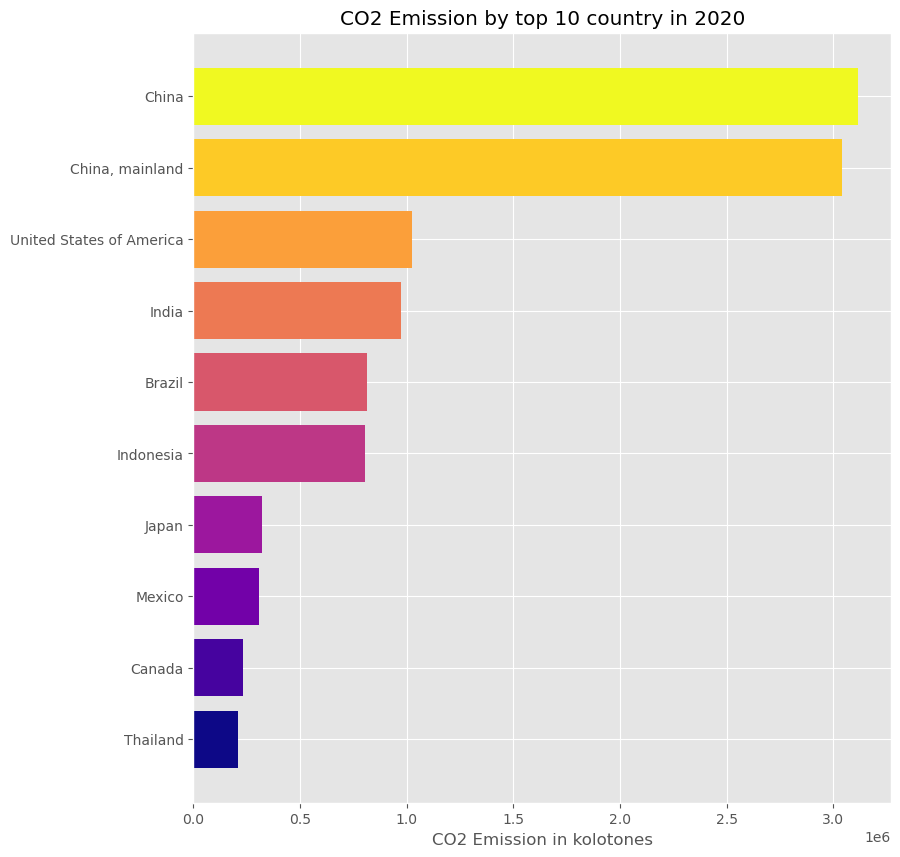

In [68]:
def country_emi(df,year, length = 10):
        df = df.copy()
        plot = df.loc[df["Year"]==year]
        plot = plot.sort_values(by = "total_emission", ascending = True).tail(length)
        colors = pyplot.get_cmap('plasma', len(plot))
        plt.figure(figsize=(9, 10))
        plt.barh(plot['Area'], 
                plot['total_emission'], 
                color=colors(range(len(plot))))
        plt.title(f'CO2 Emission by top {length} country in {year}')
        plt.xlabel('CO2 Emission in kolotones')
        plt.savefig("../../outputs/Dataset_03/top_countries.png",format="png")
        plt.show()

country_emi(df, year=2020)

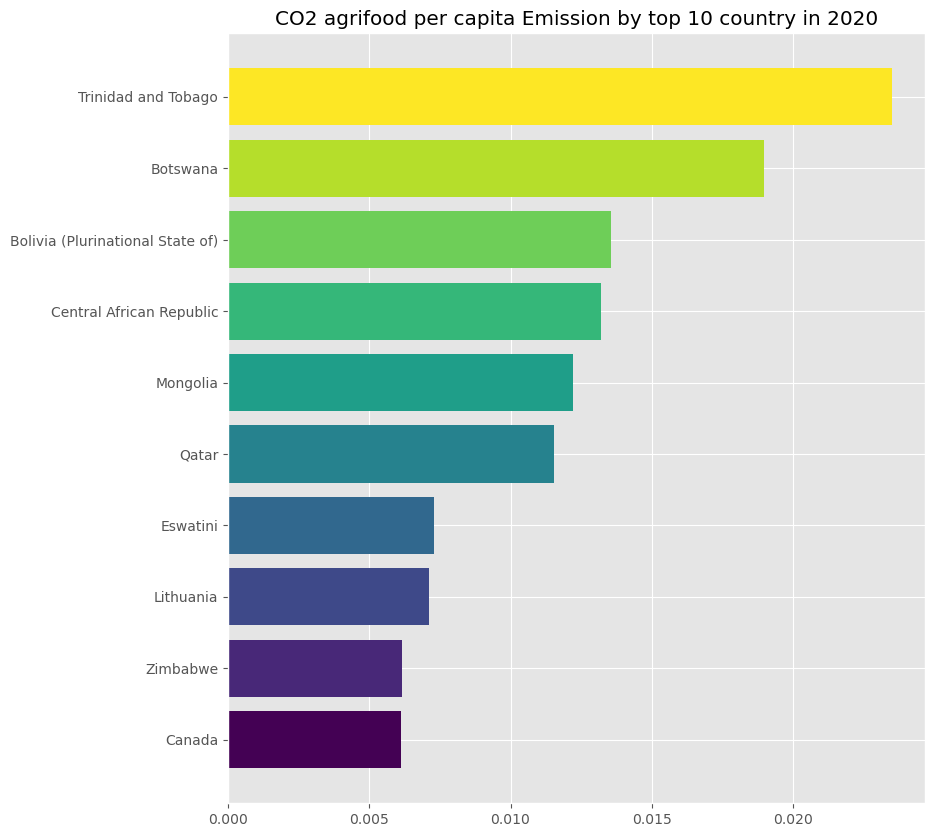

In [69]:
# let's create a feature with co2 per capita compsuntion in kilotones
from matplotlib import pyplot
df["per_capita_emission_kt"] = df["total_emission"] / df["pop_tot"] 

def percapita_emi(df,year, length = 10):
        df = df.copy()
        # let's remove small island or counties ehit this filter
        plot = df.loc[(df["Year"]==year) & (df["pop_tot"] > 800000)]
        plot = plot.sort_values(by = "per_capita_emission_kt", ascending = True).tail(length)
        colors = pyplot.get_cmap('viridis', len(plot))
        plt.figure(figsize=(9, 10))
        plt.barh(plot['Area'], 
                plot['per_capita_emission_kt'], 
                color=colors(range(len(plot))))
        plt.title(f'CO2 agrifood per capita Emission by top {length} country in {year}')
        plt.savefig("../../outputs/Dataset_03/agreefood_percapita.png",format="png")
        plt.show()

percapita_emi(df, year=2020)

# Insights:
In this exploratory data analysis following insights are drawn:
- **Asia** is the continent with the **largest CO2 emissions**.
- Asia's huge emission is strongly correlated with its vast population. In fact, **Oceania, followed by the Americas, have the highest per capita emissions**.
- Regarding **temperature**, specifically the average annual increase in Celsius, **Europe appears to be the continent most affected by climate change**, as observed in the graph below.

C:\Users\Asus\AppData\Local\Temp\ipykernel_17080\3144035120.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Asus\AppData\Local\Temp\ipykernel_17080\3144035120.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



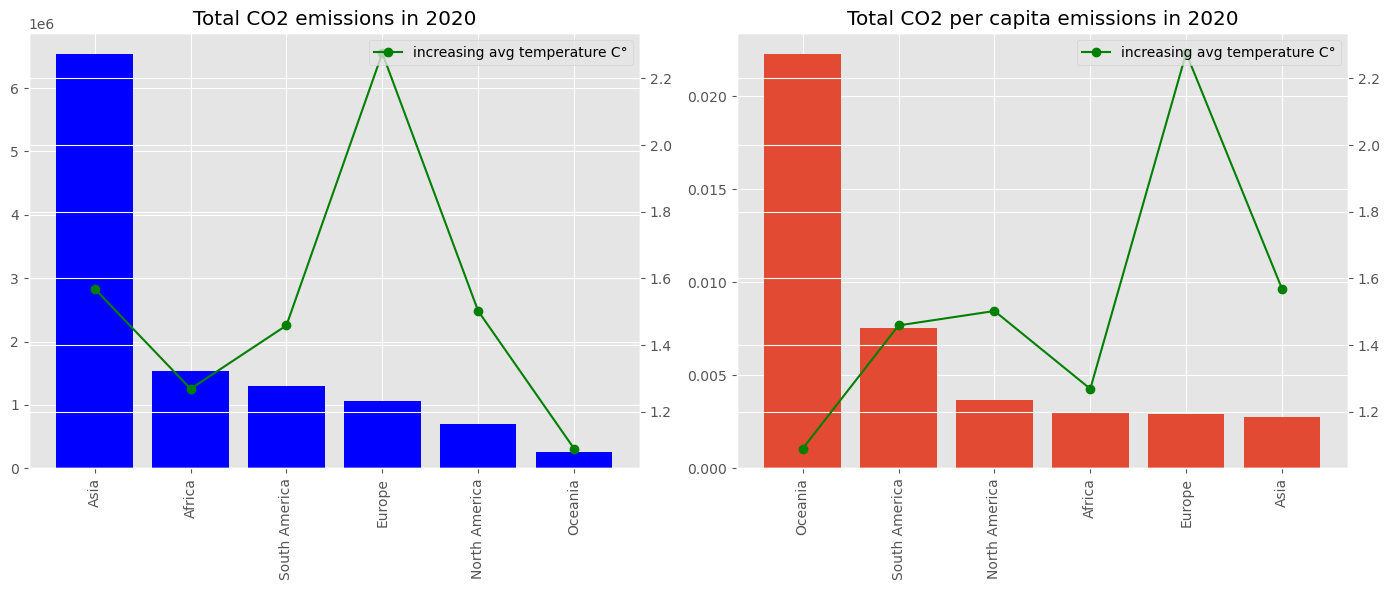

In [71]:
def continental_emission(year =2020):
    continent_df = df.loc[(df.pop_tot > 500000) & (df.Year == year)]\
        .groupby("continent")\
        .agg({"total_emission":"sum",
            "Average Temperature °C":"median",
            "per_capita_emission_kt":"mean"}).reset_index()
    continent_df = continent_df.sort_values(by="total_emission", ascending=False)
    colors = pyplot.get_cmap('viridis', len(continent_df))

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].bar(continent_df["continent"], continent_df.total_emission, color="blue")
    ax[0].set_title(f"Total CO2 emissions in {year}")

    ax2 = ax[0].twinx() 
    ax2.plot(continent_df["continent"], continent_df["Average Temperature °C"], color='green', marker='o')
    ax2.legend(["increasing avg temperature C°"], loc='upper right') 


    continent_df = continent_df.sort_values(by="per_capita_emission_kt", ascending=False)
    ax[1].bar(continent_df["continent"], continent_df["per_capita_emission_kt"])
    ax[1].set_title(f"Total CO2 per capita emissions in {year}")
    ax3 = ax[1].twinx() 
    ax3.plot(continent_df["continent"], continent_df["Average Temperature °C"], color='green', marker='o')
    ax3.legend(["increasing avg temperature C°"], loc='upper right')

    for axis in ax:
        axis.set_xticklabels(axis.get_xticklabels(), rotation='vertical')

    plt.tight_layout()
    plt.savefig("../../outputs/Dataset_03/toal_co2_emmision.png",format="png")
    plt.show()

continental_emission(year =2020)

In [ ]:
sns.pairplot(df, vars =[
     'Savanna fires', 'Forest fires', 
     "total_emission", 'Crop Residues',
     'Rice Cultivation','Pesticides Manufacturing',
     'Food Transport',"Average Temperature °C"
],
y_vars="Average Temperature °C",
hue = "continent")
plt.savefig("../../outputs/Dataset_03/pairplot_year.png",format="png")
plt.show()

### Conclusion

The figures all tell a great tale regarding the dynamic of global climate changes. CO₂ emissions are actually in lockstep with ever-increasing global temperatures. Many of them also contribute significantly in terms of emissions per capita from the agrifood sector. Insights from studies indicate that this enhances the need for international policy reform, sector-specific measures, and public awareness efforts dedicated toward addressing the looming crisis from environmental change as it intensifies.